## Data Mining:  Lab2 - data preprocessing 

Main objective: learn how to use preprocessing techniques / Obiectiv: familiarizare cu tehnici de preprocesare

Preprocessing tasks / Tipuri de preprocesare:
 * data cleaning (missing values)  / curatirea datelor (valori absente)  
 * data conversion / conversia datelor
 * data transformation / transformarea datelor
   * scaling / scalare
   * standardization / standardizare
   * normalization / normalizare
 * attribute selection / selecția atributelor
   * supervised case / cazul supervizat
   * unsupervised case / cazul nesupervizat
 * data projection / proiecția datelor
   * PCA - Principal Component Analysis / Analiza în componentele principale
   * Nonlinear projection: tSNE, UMAP  / Tehnici neliniare de proiectie: tSNE, UMAP


### Step 1. Reading the data + visualization / Citirea datelor + vizualizare 

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.io.arff import loadarff    # for arff files / pt fisiere arff

In [4]:
#  Care insurance data: https://archive.ics.uci.edu/dataset/10/automobile
data = loadarff('./datasets/lab2/autos.arff')                      
dfAutos = pd.DataFrame(data[0])  # construct a dataframe

In [5]:
# convert the bytes-type attributes in strings
attrAutos = list(dfAutos)
categAttr = np.append(attrAutos[1:8],["fuel-system","symboling"])
for a in categAttr:
    dfAutos[a]=dfAutos[a].apply(lambda x: x.decode('utf-8'))

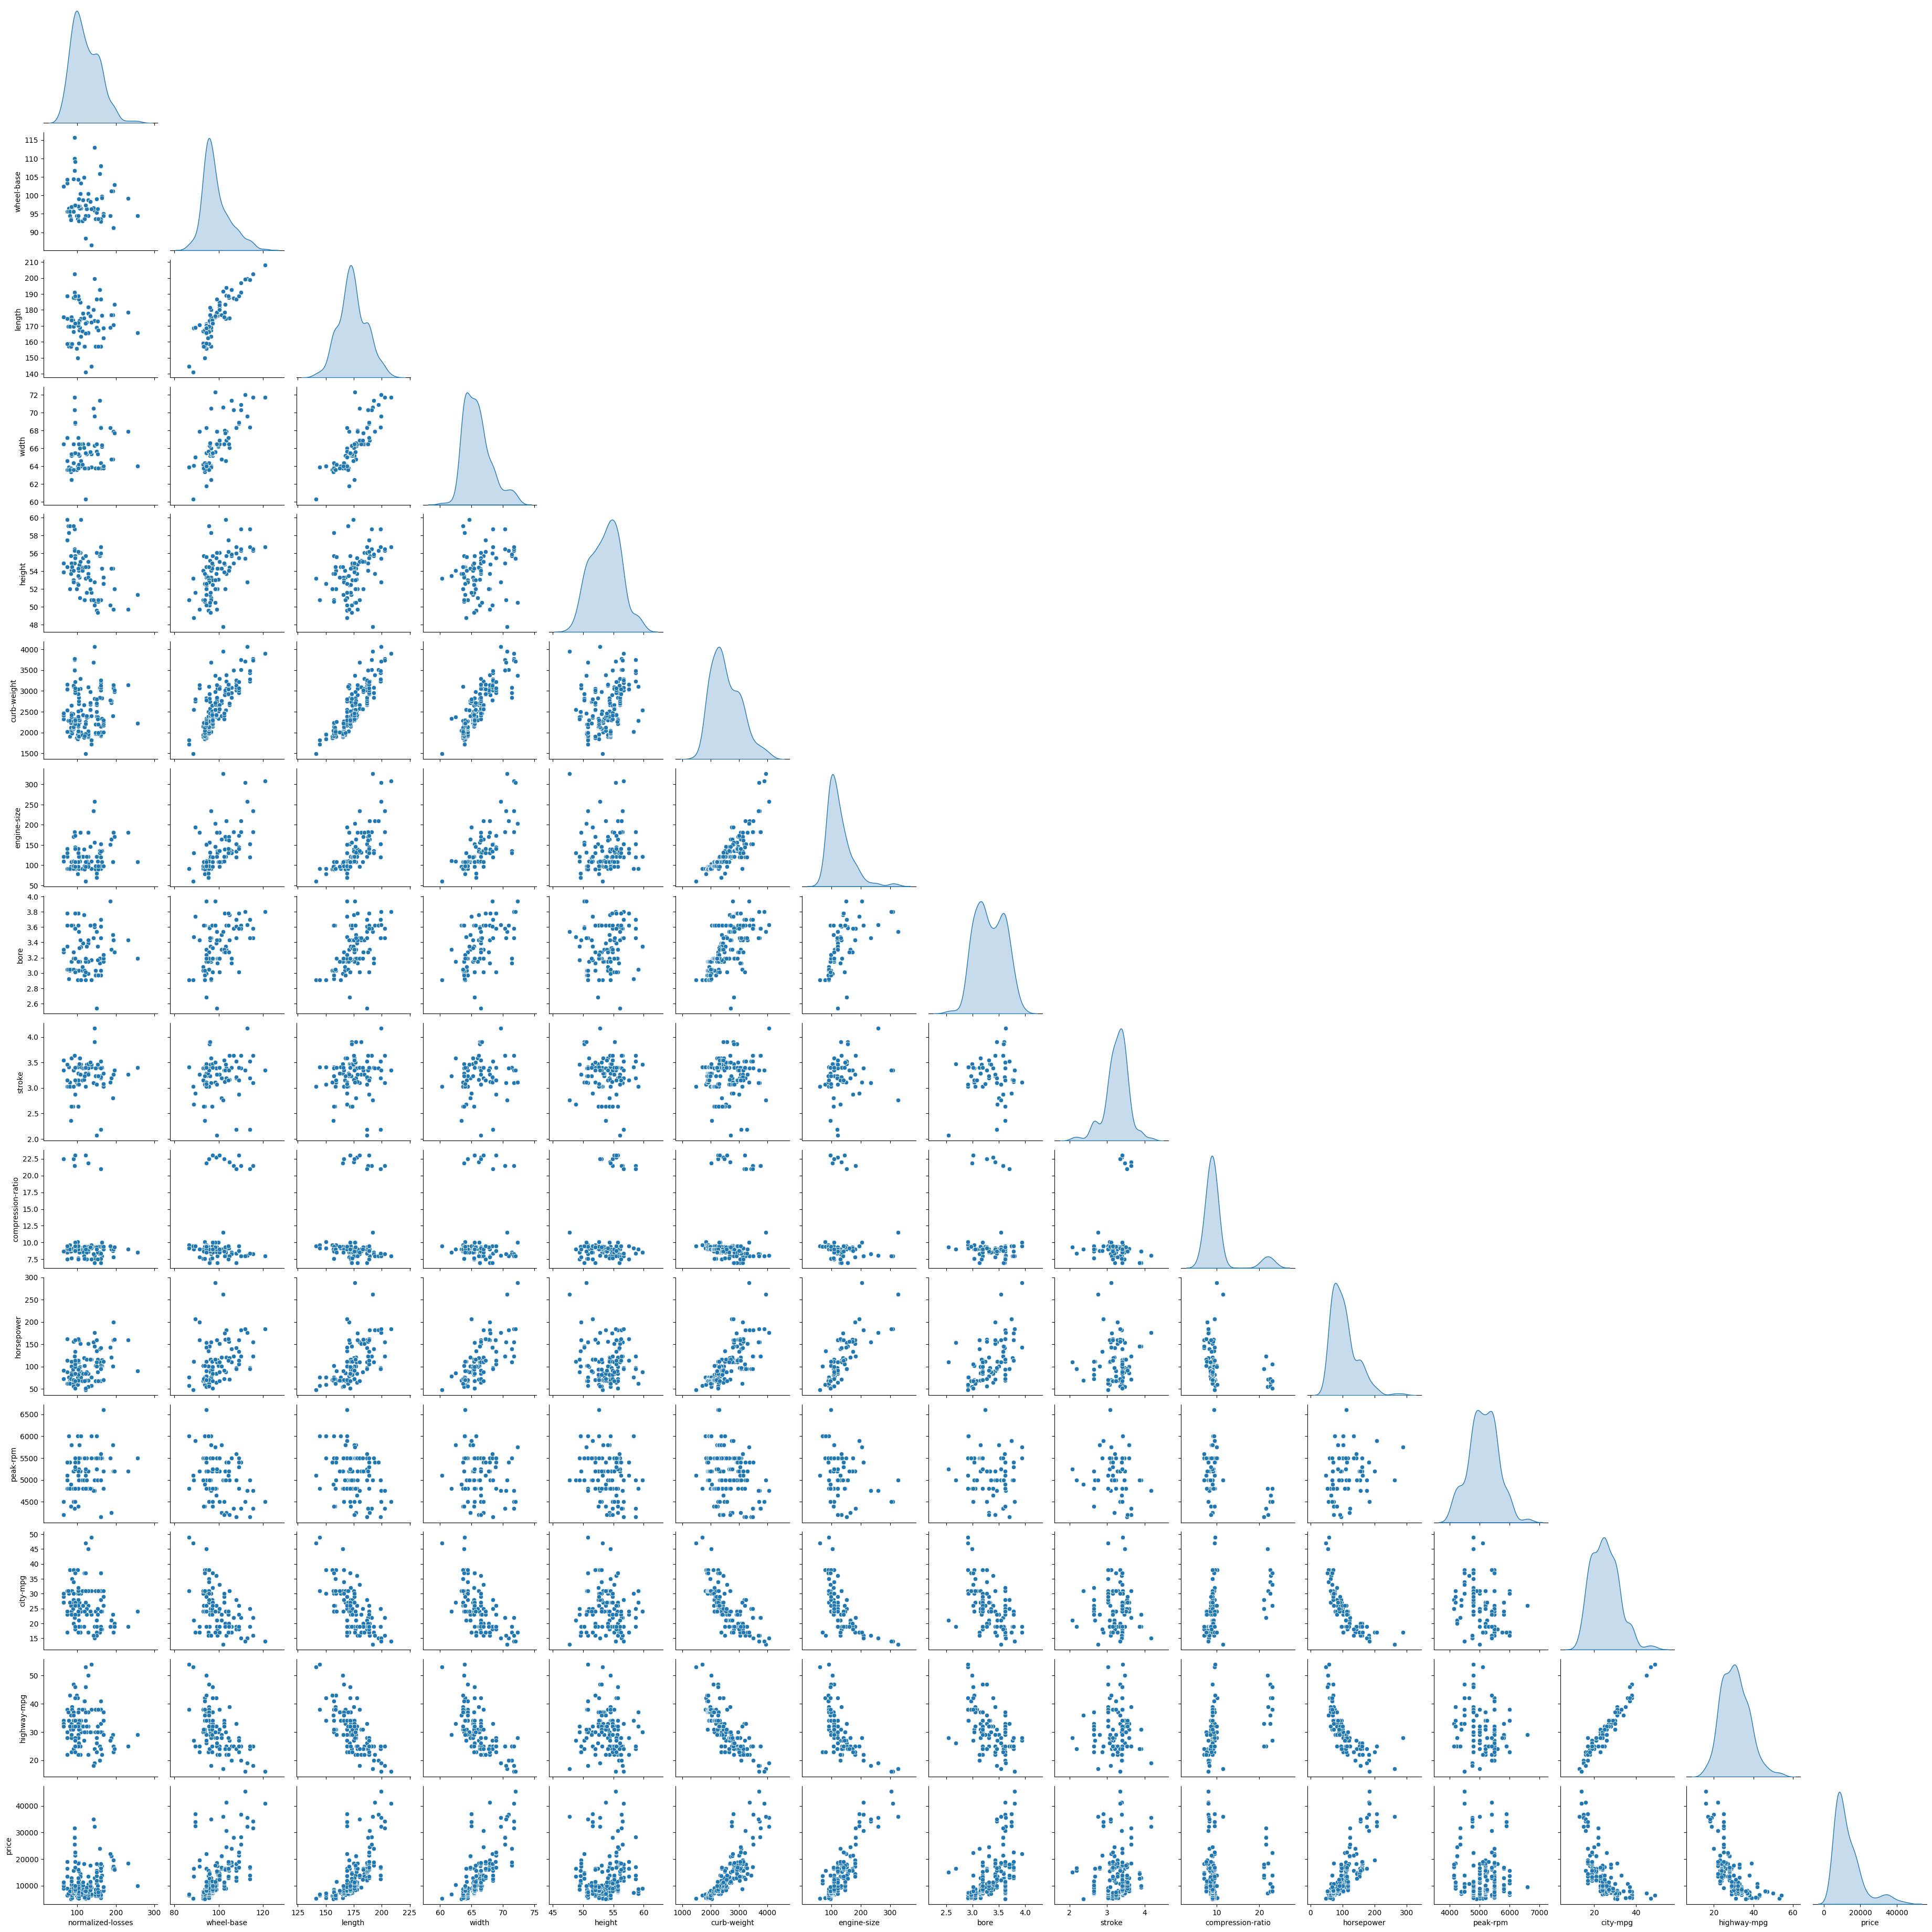

In [6]:
# data visualization - relationships between numerical attributes
import seaborn as sns
grid = sns.pairplot(dfAutos, diag_kind="kde", corner=True)

### Step 2a. Check if there are missing values / Verificare daca sunt valori absente 
* Which attributes contain missing values? / Care atribute contin valori absente
* Which instances contain missing values? / Care instante contin valori absente
* Which is the proportion of missing values for an attribute? / Care e proportia de valori absente in fiecare dintre atribute?

In [7]:
# Which attributes contain missing values?
dfAutos.isna().any()

normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
symboling            False
dtype: bool

In [9]:
# compute the percentage of missing values
dfAutos.isna().sum() / dfAutos.shape[0]*100

normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
symboling             0.00000
dtype: float64

In [10]:
# find instances with missing values
dfAutos.isna().any(axis=1)

0       True
1       True
2       True
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

#### Question:  
 * how many instances contain missing values? / cate instante contin valori absente?

In [11]:
missing_values_sum = dfAutos.isna().any(axis=1).sum()
print(missing_values_sum)

45


### Step 2b:  Remove instances with missing data / Eliminare instante cu valori absente

In [13]:
dfAutosClean = dfAutos.dropna()  # remove all instances containing at least one missing value

### Step 2c. Imputation of missing values / Imputarea valorilor absente
* Imputation models in Scikit-learn / Tehnici de imputare implementate in Scikit-learn
  * SimpleImputer - https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer - it uses only values of the current attribute;  possible strategies: 'mean', 'median', 'most_frequent', 'constant'
  * multivariate imputers (they use also values of the other attributes to decide which instances will be used to compute the estimation for the missing value):
    * KNNImputer - https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer - it uses values from several nearest neighbours
    * IterativeImputer - https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer 

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(dfAutos)  # construct the imputation model based on the strategy / construirea modelului de imputare
AutosImp = imp.transform(dfAutos) # apply the imputation model / aplicarea modelului de imputare

In [15]:
dfAutosImp = pd.DataFrame(AutosImp, columns=dfAutos.columns)

### Exercise 1:  
* Dataset Autos: Analyze the influence of different imputation strategies ('mean', 'median', 'most_frequent', 'constant') - depending on the attribute type/ aplicati diferite strategii de imputare - in functie de tipul atributului 
* Dataset Arrhythmia: Analyze the dataset and clean it (wrt missing values) / Analizati setul de date si aplicati strategii adecvate de curatare (dpdv al valorilor absente)

In [16]:
# Dataset: Autos, Strategies: median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(dfAutos[['normalized-losses']])  # Fit the imputer on the DataFrame

autos_imp_median = imp_median.transform(dfAutos[['normalized-losses']]) # Apply the imputation model
df_autos_imp_median = pd.DataFrame(autos_imp_median, columns=['normalized-losses'])  # Create DataFrame from imputed values
median_value = df_autos_imp_median['normalized-losses'].median()
print(median_value)

115.0


In [17]:
# Hint - starting steps for Arrhythmia dataset 
data = loadarff('./datasets/lab2/arrhythmia.arff')                        
dfArrhythmia = pd.DataFrame(data[0])
# Hint - analyze the number of instances with missing values
mvInstances = dfArrhythmia.isna().sum(axis=1)
mvInstances.value_counts()
# Hint - analyze the number of attributes with missing values
mvAttributes = dfArrhythmia.isna().sum(axis=0)
mvAttributes.value_counts()
# Hint - find the attribute with the largest number of missing values
dfArrhythmia.columns[np.argmax(mvAttributes)]
# decide how to clean the dataset
# remove attribute (376 missing values from 452)

'J'

### Step 3.  Data conversion (discretization, binarization) / Conversia datelor (discretizare, binarizare)

#### Step 3a - discretization of a numeric attribute  / discretizarea unui atribut numeric

* Discretization in Scikit-learn: KBinsDiscretizer
  * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer
  * Stragies: 'uniform', 'quantile' (default), 'kMeans'
  * Different types of encoding: 'onehot' (default), 'onehot-dense','ordinal'

In [18]:
# Example:  discretization of the "price" attribute in Autos dataset / discretizarea atributului "price" din setul Autos
from sklearn import preprocessing
discretizer = preprocessing.KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal') 
contPrice = np.array(dfAutosImp.price) # array of original price values

In [19]:
# construct and apply the discretizer
discPrice = discretizer.fit_transform(contPrice.reshape(-1,1))

/home/mihai/.local/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [20]:
discPrice=discretizer.transform(contPrice.reshape(-1,1))

(array([85., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

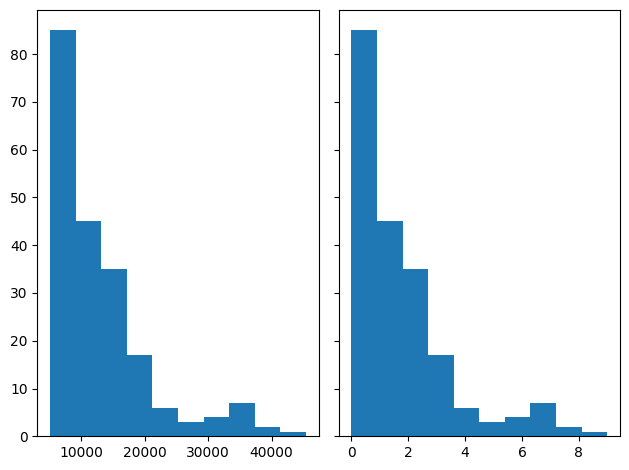

In [21]:
# analyze the distribution of original and discretized values / analiza distributiei valorilor initiale si a celor discretizate
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(contPrice, bins=10)
axs[1].hist(discPrice, bins=10)

### Exercise 2:  
* Dataset Autos: Analyze the influence of different discretization strategies ('uniform', 'quantile', 'kmeans') 

/home/mihai/.local/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/mihai/.local/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/mihai/.local/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


(array([11., 16., 31., 31., 25., 19., 61.,  9.,  1.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

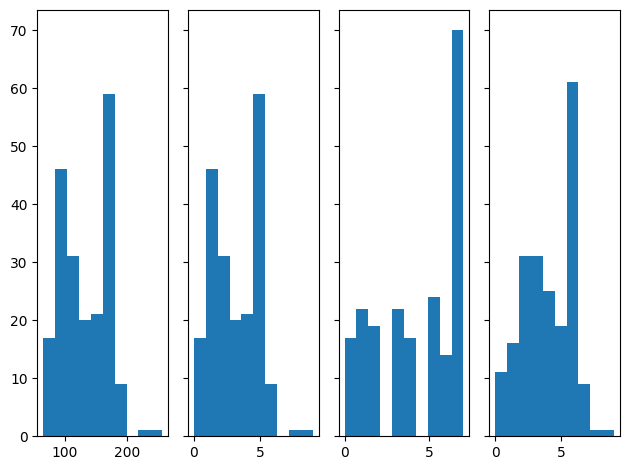

In [22]:
discretizer_u = preprocessing.KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal')
discretizer_q = preprocessing.KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
discretizer_k = preprocessing.KBinsDiscretizer(n_bins=10, strategy='kmeans', encode='ordinal')

cont_nl = np.array(dfAutosImp['normalized-losses'])

disc_nl_u = discretizer_u.fit_transform(cont_nl.reshape(-1,1))
disc_nl_q = discretizer_q.fit_transform(cont_nl.reshape(-1,1))
disc_nl_k = discretizer_k.fit_transform(cont_nl.reshape(-1,1))

fig3, axs3 = plt.subplots(1, 4, sharey=True, tight_layout=True)

axs3[0].hist(cont_nl, bins=10)
axs3[1].hist(disc_nl_u, bins=10)
axs3[2].hist(disc_nl_q, bins=10)
axs3[3].hist(disc_nl_k, bins=10)

#### Step 3b. Binarization/ binarizare
* Binarization in Scikit learn: OneHotEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [23]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(sparse_output=False) # default: sparse_output=True
BodyStyle = np.array(dfAutosImp["body-style"])
enc.fit(BodyStyle.reshape(-1,1))
binBodyStyle=enc.transform(BodyStyle.reshape(-1,1))

In [24]:
binBodyStyle

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

### Step 4. Data transformation / Transformarea datelor
 * Scaling - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html --> values in [0,1]
 * Standardization - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html --> values with mean 0 and standard deviation 1

In [25]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
HP = np.array(dfAutosImp["horsepower"])
scaler.fit(HP.reshape(-1,1))
HPscaled=scaler.transform(HP.reshape(-1,1))

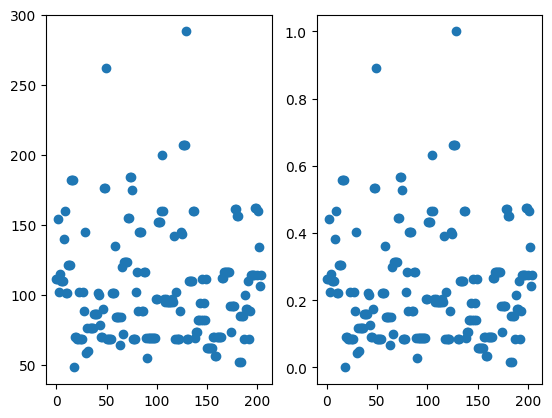

In [26]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].scatter(range(len(HP)),HP)
axs[1].scatter(range(len(HPscaled)),HPscaled)

In [27]:
# standardization / standardizare
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
HP = np.array(dfAutosImp["horsepower"])
scaler.fit(HP.reshape(-1,1))
HPstd=scaler.transform(HP.reshape(-1,1))

In [31]:
# comparison between the means of the original values and the transformed ones / comparatie intre mediile valorilor inainte si dupa transformare
[np.mean(HP), np.mean(HPscaled), np.mean(HPstd)]

[103.90243902439025, 0.2329268292682926, -1.1264701908391832e-16]

In [30]:
# comparison between the standard deviations of the original values and the transformed ones / comparatie intre abaterile standard ale valorilor inainte si dupa transformare
[np.std(HP), np.std(HPscaled), np.std(HPstd)]

[39.58344374156199, 0.16493101558984166, 1.0]

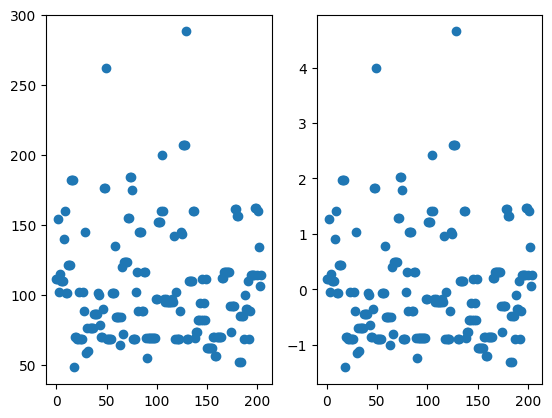

In [32]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].scatter(range(len(HP)),HP)
axs[1].scatter(range(len(HPstd)),HPstd)

Text(0.5, 1.0, 'StandardScaler')

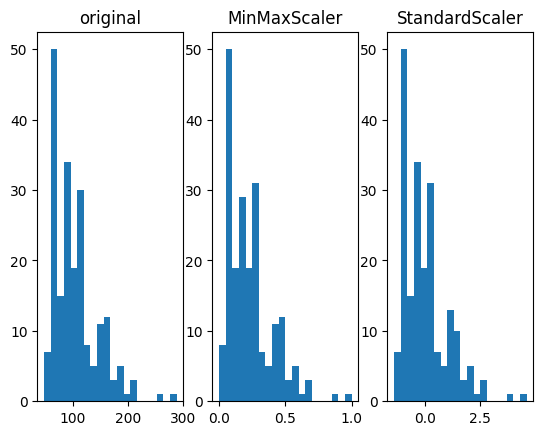

In [33]:
# visualization of the estimated distributions / 
fig, axs = plt.subplots(1, 3)
axs[0].hist(HP,bins=20)
axs[0].set_title("original")
axs[1].hist(HPscaled,bins=20)
axs[1].set_title("MinMaxScaler")
axs[2].hist(HPstd,bins=20)
axs[2].set_title("StandardScaler")

### Step 5. Attribute selection / Selectia atributelor
* Incremental selection - select the attributes: / selectie incrementala a atributelor
  * in decreasing order of the Mutual Information (Information Gain) / descrescator dupa informatia mutuala (castig informational)
  * in decreasing order of the chi2 value / descrescator dupa chi2
* Scikit-learn function: SelectKBest (it can be applied only for numerical attributes)
  * https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
  * parameters:
    * score to be used (score_func) = function name (e.g. mutual_info_classif, chi2, f_classif, mutual_info_regression, f_regression etc)
    * number of attributes to select (k)
  

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [35]:
dfIris = pd.read_csv('./datasets/lab2/iris.csv')

In [36]:
dfIris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
# separate the predictive and the class attributes / separarea atributelor predictive de cel de clasa
irisPred = dfIris.iloc[:,0:4]
irisClass = dfIris.iloc[:,4:5]

In [38]:
# SelectKBest requires numpy arrays not dataframes / SelectKBest asteapta vectori
irisMI = SelectKBest(mutual_info_classif, k=2).fit_transform(irisPred.to_numpy(), irisClass.to_numpy()) 
irisMI

/home/mihai/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [81]:
# Mutual information computation
mutual_info_classif(irisPred.to_numpy(), irisClass.to_numpy().ravel())

array([0.5042816 , 0.25636014, 0.99072684, 0.99446842])

In [82]:
irisChi2 = SelectKBest(chi2, k=2).fit_transform(irisPred.to_numpy(), irisClass.to_numpy()) 
irisChi2

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [83]:
# chi2 returns both the chi2 value as well as the p-value 
# (small p-values allows to reject the assumption that the class attribute and the predictive attribute are independent)
chi2(irisPred.to_numpy(), irisClass.to_numpy())

(array([ 10.81782088,   3.59449902, 116.16984746,  67.24482759]),
 array([4.47651499e-03, 1.65754167e-01, 5.94344354e-26, 2.50017968e-15]))

In [84]:
from sklearn.feature_selection import f_classif
f_classif(irisPred.to_numpy(), irisClass.to_numpy().ravel())

(array([ 119.26450218,   47.3644614 , 1179.0343277 ,  959.32440573]),
 array([1.66966919e-31, 1.32791652e-16, 3.05197580e-91, 4.37695696e-85]))

#### Remark: 
 * SelectKBest works only for numerical attributes; nominal attributes should be converted in numerical attributes / SelectKBest poate fi aplicat doar atributelor numerice (cele nominale trebuie convertite)

In [85]:
dfWeather = pd.read_csv('./datasets/lab2/weatherNominal.csv')

In [86]:
weatherPred=dfWeather.iloc[:,0:4]

In [87]:
weatherPred

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [88]:
weatherClass=dfWeather.iloc[:,4:5]

In [89]:
enc = preprocessing.OrdinalEncoder() #preprocessing.OneHotEncoder()

In [90]:
weatherPredNumerical=enc.fit_transform(weatherPred.to_numpy())

In [91]:
weatherPredNumerical

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

In [92]:
weatherMI=SelectKBest(chi2, k=2).fit_transform(weatherPredNumerical, weatherClass.to_numpy()) 

In [93]:
weatherMI   # outlook, humidity

array([[2., 0.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.]])

In [94]:
weatherClass

,play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


### Exercise 3:
 * Dataset Autos:
   * find the numerical attribute that has the highest discriminative power for a classification task based on "symboling" / determinati atributul numeric cu cea mai mare putere de discriminare in raport cu atributul de clasa "symboling"

In [96]:
# Hint
autosNrAttr = ['normalized-losses', 'wheel-base', 'length', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
autosPred = dfAutosImp.loc[:,autosNrAttr]
autosClass = dfAutosImp.iloc[:,25:26]
MIautos = mutual_info_classif(autosPred.to_numpy(), autosClass.to_numpy().ravel())
CHI2autos = chi2(autosPred.to_numpy(), autosClass.to_numpy().ravel())
Fautos = f_classif(autosPred.to_numpy(), autosClass.to_numpy().ravel())

# ...

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling'],
      dtype='object')


### Step 6.  Data projection / Proiectia datelor
 * Linear projection:  PCA / proiectie liniara: PCA
 * Nonlinear projection:  tSNE, UMAP / proiectie neliniara: tSNE, UMAP

#### 6a. Principal Components Analysis

In [277]:
from sklearn.decomposition import PCA
irisPred = dfIris.iloc[:,0:4].to_numpy()
irisClass = dfIris.iloc[:,4:5].to_numpy()

In [262]:
pca = PCA(n_components=4)
pca.fit(irisPred)

PCA(n_components=4)

In [266]:
# singulare values in decreasing order / valorile singulare 
print(pca.singular_values_)

[25.08986398  6.00785254  3.42053538  1.87850234]


In [270]:
# ratio of explained variance by each principal direction in decreasing order of values 
# proportia de varianta explicata de catre fiecare directie principala
varRatio = pca.explained_variance_ratio_
# sum of the first two ratios
varRatio[0]+varRatio[1]

0.9776317750248034

In [272]:
# projection on the first 2 principal directions / proiectia pe primele 2 componente principale
iris2D=PCA(n_components=2).fit_transform(irisPred)

In [283]:
enc = preprocessing.OrdinalEncoder()
irisClassNumerical=enc.fit_transform(irisClass)

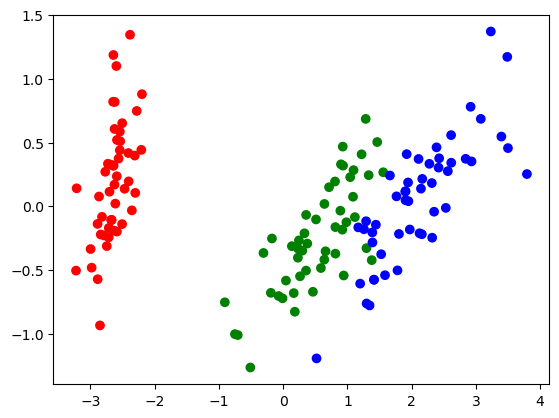

In [284]:
import matplotlib.pyplot as plt
colormap = np.array(['r', 'g', 'b'])
irisClassNumericalInt=[int(irisClassNumerical[i,0]) for i in range(0,len(irisClassNumerical))]
plt.scatter(iris2D[:,0], iris2D[:,1], c=colormap[irisClassNumericalInt])

In [216]:
# PCA also centered the data / PCA transforma datele astfel incat media sa fie nula (aproximativ)
[np.mean(iris2D[:,0]), np.mean(iris2D[:,1])]

[1.8947806286936006e-16, -5.092222939614052e-16]

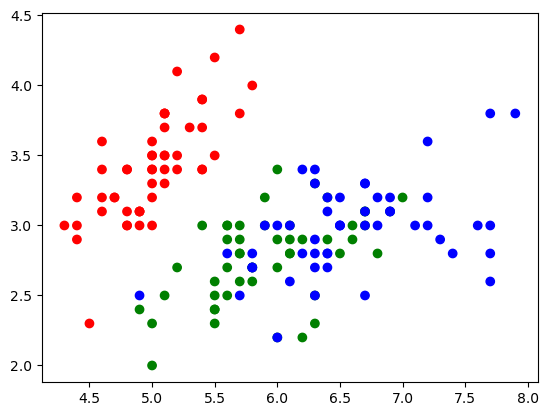

In [285]:
#  original data (first two attributtes)/  datele initiale (primele 2 atribute) - sepallength, sepalwidth
import matplotlib.pyplot as plt
colormap = np.array(['r', 'g', 'b'])
irisClassNumericalInt=[int(irisClassNumerical[i,0]) for i in range(0,len(irisClassNumerical))]
iris=dfIris.to_numpy()
plt.scatter(iris[:,0], iris[:,1], c=colormap[irisClassNumericalInt])

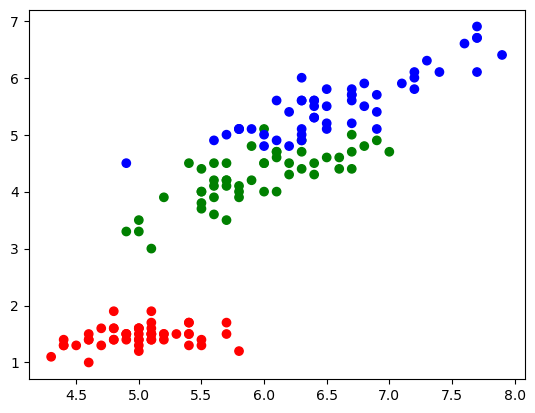

In [218]:
plt.scatter(iris[:,0], iris[:,2], c=colormap[irisClassNumericalInt]) # sepallength, petallength

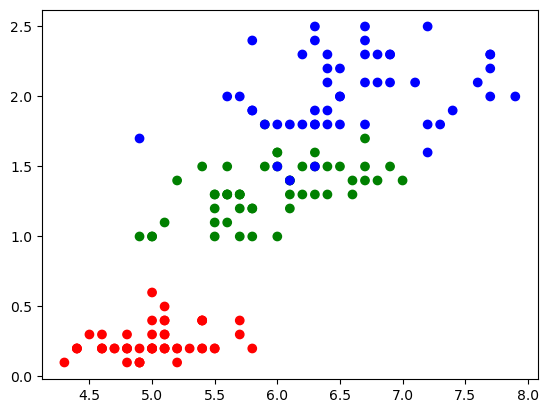

In [219]:
plt.scatter(iris[:,0], iris[:,3], c=colormap[irisClassNumericalInt]) # sepallength, petalwidth

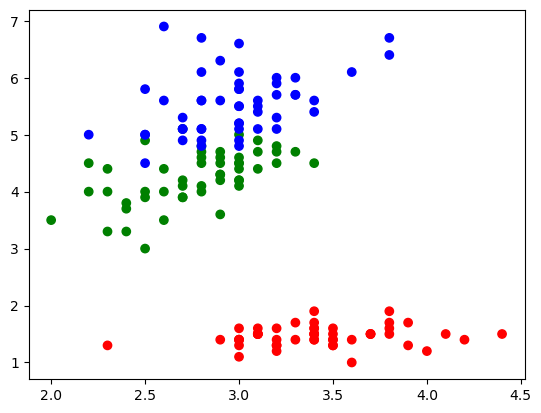

In [220]:
plt.scatter(iris[:,1], iris[:,2], c=colormap[irisClassNumericalInt]) # sepalwidth, petallength

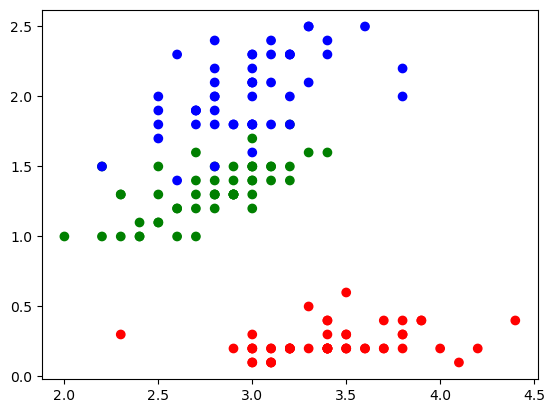

In [221]:
plt.scatter(iris[:,1], iris[:,3], c=colormap[irisClassNumericalInt]) # sepalwidth, petalwidth

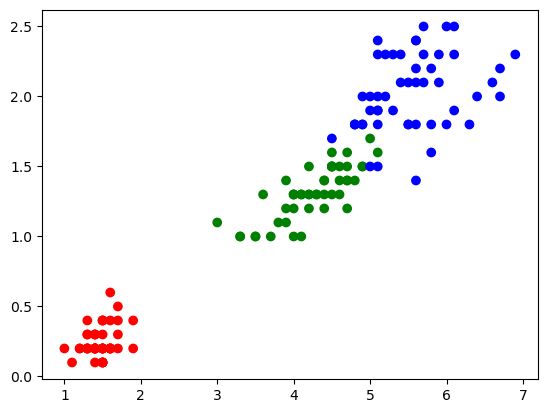

In [222]:
plt.scatter(iris[:,2], iris[:,3], c=colormap[irisClassNumericalInt]) # petallength, petalwidth

#### 6b. Nonlinear projection: tSNE, UMAP

In [225]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

C:\Users\A1\anaconda3\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


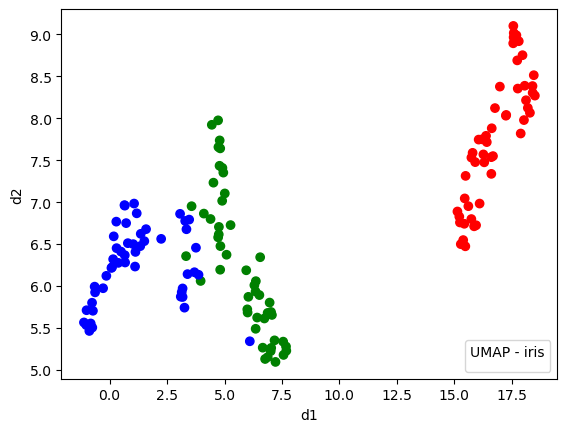

In [227]:
embeddingUMAP_Iris = umap.UMAP().fit_transform(irisPred)
_, ax = plt.subplots()
scatter = ax.scatter(embeddingUMAP_Iris[:, 0], embeddingUMAP_Iris[:, 1], c=colormap[irisClassNumericalInt])
ax.set(xlabel='d1', ylabel='d2')
_ = ax.legend(scatter.legend_elements()[0], ['setosa', 'versicolor', 'virginica'], loc="lower right", title="UMAP - iris")
plt.savefig('UMAP_iris.png')

C:\Users\A1\anaconda3\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


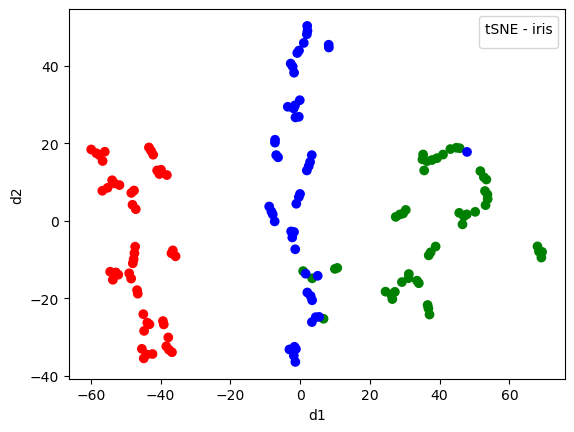

In [228]:
embeddingTSNE_iris = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=3).fit_transform(irisPred)
_, ax = plt.subplots()
scatter = ax.scatter(embeddingTSNE_iris[:, 0], embeddingTSNE_iris[:, 1], c=colormap[irisClassNumericalInt])
ax.set(xlabel='d1', ylabel='d2')
_ = ax.legend(scatter.legend_elements()[0], ['setosa', 'versicolor', 'virginica'], loc="upper right", title="tSNE - iris")
plt.savefig('tSNE_iris.png')

### Exercise 4
 * Autos dataset:
   * identify the numerical attributes that explain at least 99% of the data variability
   * visualize the numerical attribute by using 2D projection based on PCA and tSNE

In [290]:
# Hint:
autosNrAttr = ['normalized-losses', 'wheel-base', 'length', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
autosPred = dfAutosImp.loc[:,autosNrAttr]
autosClass = dfAutosImp.iloc[:,25:26]
pcaAutos = PCA(n_components=len(autosNrAttr))
pcaAutos.fit(autosPred)
varRatioAutos = pcaAutos.explained_variance_ratio_
# ... how many principal components are required?

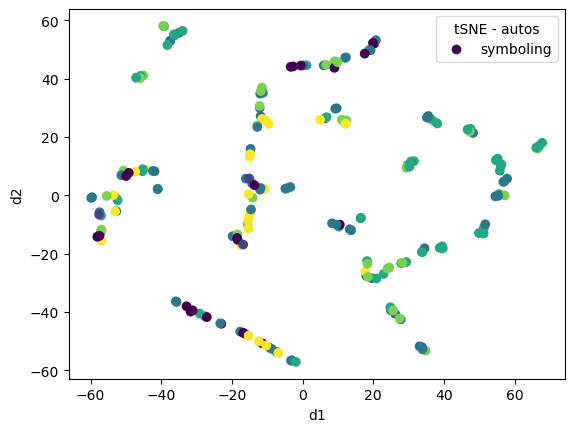

In [298]:
enc = preprocessing.OrdinalEncoder()
autosClassNumerical=enc.fit_transform(autosClass)
embeddingTSNE_autos = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=3).fit_transform(autosPred)
_, ax = plt.subplots()
scatter = ax.scatter(embeddingTSNE_autos[:, 0], embeddingTSNE_autos[:, 1], c=autosClassNumerical.ravel())
ax.set(xlabel='d1', ylabel='d2')
_ = ax.legend(scatter.legend_elements()[0], autosClass, loc="upper right", title="tSNE - autos")
# ... analyze the influence of the perplexity value

### Exercise 5
 * Autos dataset:
   * check if the dataset is unbalanced (wrt 'symboling') / verificati daca setul de date este nebalansat (in raport cu atributul 'symboling')

In [ ]:
# Hint
dfAutosImp.groupby('symboling').count()
# ...

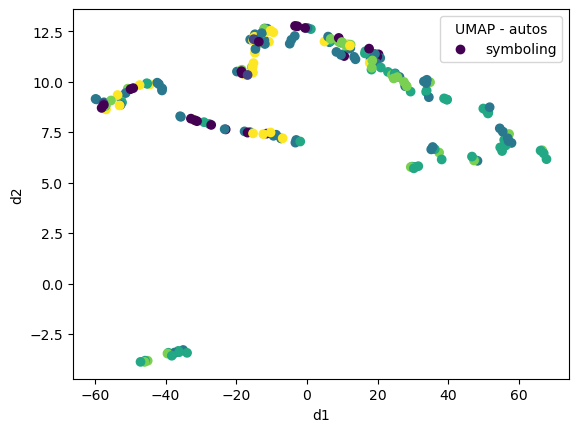

In [300]:
enc = preprocessing.OrdinalEncoder()
autosClassNumerical=enc.fit_transform(autosClass)
embeddingUMAP_autos = umap.UMAP().fit_transform(autosPred)
_, ax = plt.subplots()
scatter = ax.scatter(embeddingTSNE_autos[:, 0], embeddingUMAP_autos[:, 1], c=autosClassNumerical.ravel())
ax.set(xlabel='d1', ylabel='d2')
_ = ax.legend(scatter.legend_elements()[0], autosClass, loc="upper right", title="UMAP - autos")

# ... analyze the influence of UMAP parameters - https://pypi.org/project/umap-learn/

### Additional exercise (facultative):  
 * implement a PCA function using SVD (singular value decomposition)    / Implementati PCA folosind descompunerea dupa valori singulare
   * https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

In [ ]:
...